# 1 Nodes

## Features

- Consists on linked nodes
- Access to a value is through slicing, not by index

**Key concepts**
- Data: Value in a node
- Next/Previous: Reference to the next/before node
- Head/Tail: Reference to the first/last node

**Implementations**
- Stacks and queues
- Optimizations

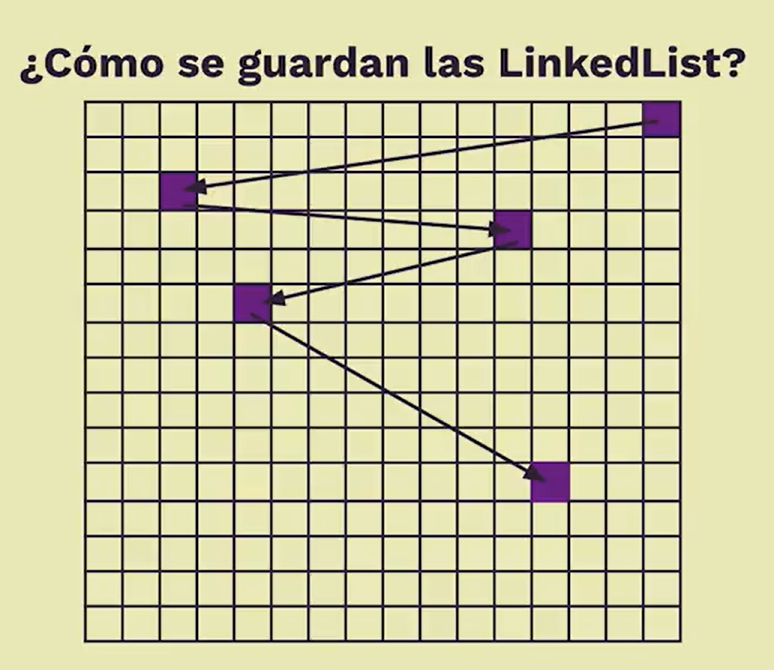

In [1]:
class Node:
    
    def __init__(self, data, next=None):
        self.data = data
        self.next = next

In [2]:
node_A = Node("A")
node_B = Node("B", node_A)
node_C = Node("C", node_A)

In [3]:
node_B.data, node_B.next.data

('B', 'A')

In [4]:
head = None
for i in range(1, 5):
    head = Node(i, head)

head = Node(1, **_**)

head = Node(2, **Node(1, _)**)

head = Node(3, **Node(2, Node(1, _)**)

head = Node(4, **Node(3, Node(2, Node(1, _)))**)


In [5]:
print(head.data)
print(head.next.data)
print(head.next.next.data)
print(head.next.next.next.data)
print(head.next.next.next.next)

4
3
2
1
None


In [6]:
while head != None:
    print(head.data)
    head = head.next

4
3
2
1


In [7]:
head = None
for i in range(1, 5):
    head = Node(i, head)

# 2. Singly Linked Lists

## Features
- Does not have index by default, it must be emulated (probe)

In [8]:
class SinglyLinkedList:
    
    def __init__(self):
        self.tail = None
        self.size = 0

    def append(self, data):
        node = Node(data)

        if self.tail == None:
            self.tail = node
        else:
            current = self.tail

            while current.next:
                 current = current.next

            current.next = node

        self.size += 1

    def size(self):
        return str(self.size)

    def iter(self):
        current = self.tail

        while current:
            value = current.data
            current = current.next
            yield value

    def delete(self, data):
        ''' 
        Slice from tail to head, if the data was found at the tail,
        then replace the tail by the next node.
        Otherwise, if the data was found at another node, then set
        the next node of previous one, to the next one of the current.
        '''
        current = self.tail
        previous = self.tail

        while current:
            
            if current.data == data:
                
                if current == self.tail:
                    self.tail = current.next
                else:
                    previous.next = current.next
                    self.size -= 1
                    return current.data

            previous = current
            current = current.next

    def search(self, data):
        for value in self.iter():
            if data == value:
                return True
            else:
                return False

    def clear(self):
        self.tail = None
        self.head = None
        self.size = 0

In [9]:
words = SinglyLinkedList()

In [10]:
words.append('egg')
words.append('ham')
words.append('spam')

In [11]:
current = words.tail
current

In [12]:
while current:
    print(current.data)
    current = current.next

egg
ham
spam


In [13]:
for word in words.iter():
    print(word)

egg
ham
spam


In [14]:
words.search('egg')

True

In [15]:
words.search('juice')

False

In [16]:
words.clear()

In [17]:
for word in words.iter():
    print(word)

### Delete method
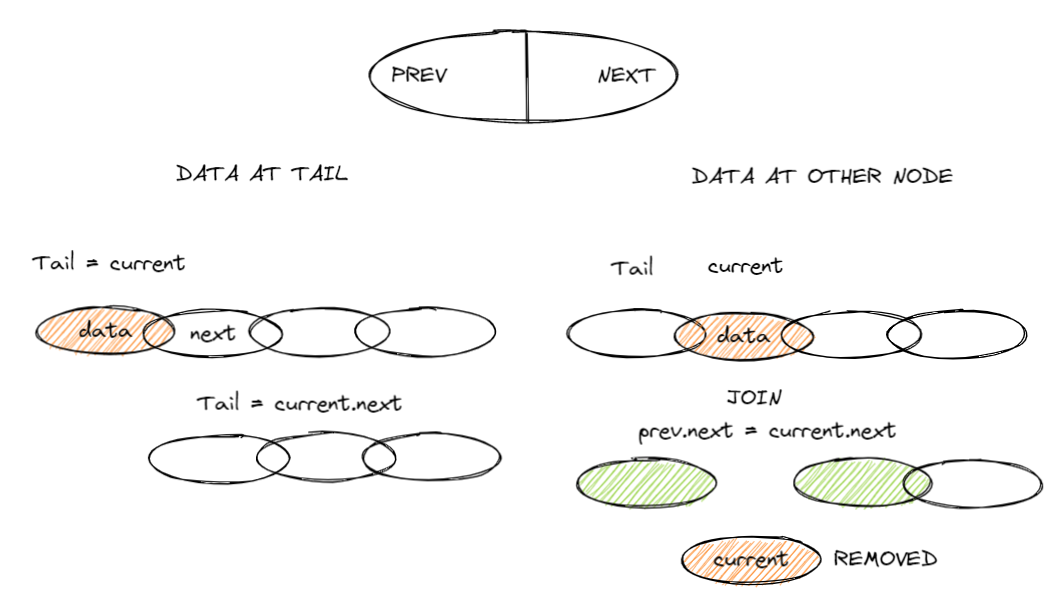

# 3. Linked Structures Operations

In [18]:
head = None
for i in range(1, 6):
    head = Node(i, head)

### Show Values

In [19]:
def show_values(linked_list):
    probe = linked_list
    
    while probe != None:
        print(probe.data)
        probe = probe.next

In [20]:
show_values(head)

5
4
3
2
1


### Search item

In [21]:
def search(linked_list, target_item):
    probe = linked_list
    while probe != None and target_item != probe.data:
        probe = probe.next

    if probe != None:
        return True
    else:
        return False

In [22]:
search(head, 2)

True

### Replace Items

In [23]:
def replace(linked_list, target_item, new_value):
    probe = linked_list
    
    while probe != None and target_item != probe.data:
        probe = probe.next

    if probe != None:
        probe.data = new_value
    else:
        return f'item {target_item} not found'

In [24]:
replace(head, 2, 'A')

In [25]:
show_values(head)

5
4
3
A
1


# 4. Circular Linked Structure

In [26]:
head = Node(None, None)
head.next = head

In [27]:
index = 1
new_item = 'ham'

In [28]:
probe = head

In [29]:
while index > 0 and probe.next != head:
    probe = probe.next
    index -= 1
    
probe.next = Node(new_item, probe.next)
print(probe.next.data)

ham


# 5 Double Linked List

In [30]:
class TwoWayNode(Node):
    
    def __init__(self, data, previous=None, next=None):
        super().__init__(data, next)
        self.previous = previous

In [31]:
head = TwoWayNode(1)
tail = head

In [32]:
for data in range(2,6):
    tail.next = TwoWayNode(data, tail)
    tail = tail.next

In [33]:
def list_items(double_linked_list, order):
    
    probe = double_linked_list
    
    while probe != None:
        print(probe.data)
        probe = probe.previous if order else probe.next

In [34]:
list_items(head, 0)

1
2
3
4
5


In [35]:
list_items(tail, 1)

5
4
3
2
1


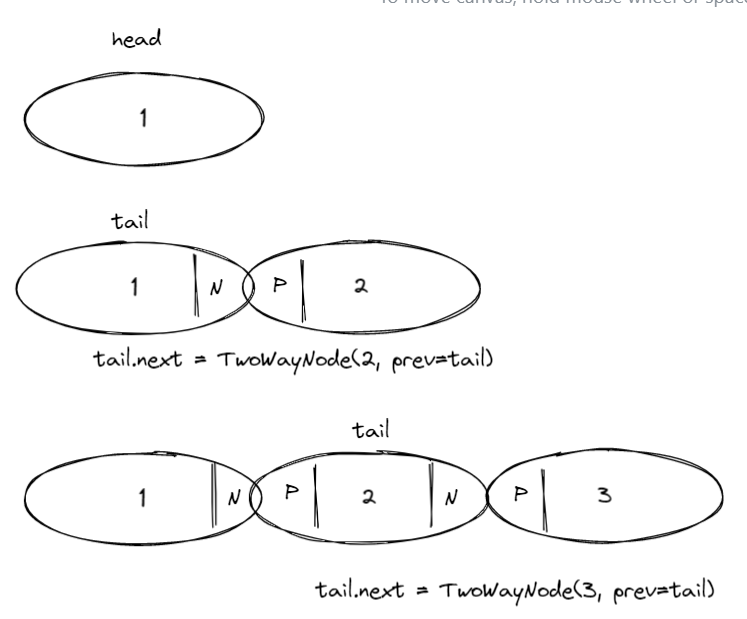